<a href="https://colab.research.google.com/github/DANUSHMATHI2002/7PAM2000-0901-Applied_Data_Science/blob/main/ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **7PAM2000-0901-2024-Applied Data Science-1**
##     ASSIGNMENT 1: Statistics and Trends

1.   NAME:**Danushmathi Pathmanaban**
2.   STUDENT ID:**23072008**
3.   GitHub Repository Link:


# **1.Importing libraries and loading data**

In [49]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Loading the dataset
df = pd.read_csv('/content/SleepStudyData.csv')


In [50]:
df.head(5)

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


# **2.Data Processing: Calculating additional columns**

In [51]:
# Calculating the sleep deficit by subtracting actual sleep from 8 hours.
df['SleepDeficit'] = df['Hours'].apply(lambda hrs: max(0, 8 - hrs))

# Detail the Phone Dependency based on usage and reach before bed
df['PhoneDependency'] = df.apply(
    lambda row: 'High' if row['PhoneReach'] == 'Yes' and row['PhoneTime'] == 'Yes' else 'Low', axis=1)

# Determining the Sleep Quality based on tiredness and adequacy of sleep
df['SleepQuality'] = df.apply(
    lambda row: 'Good' if row['Tired'] <= 2 and row['Enough'] == 'Yes' else 'Poor', axis=1)


# **3. Encoding the categorical variables and renaming columns**

In [52]:
# Categorical variables
label_encoder = preprocessing.LabelEncoder()
df['Enough'] = label_encoder.fit_transform(df['Enough'])
df['PhoneReach'] = label_encoder.fit_transform(df['PhoneReach'])
df['PhoneTime'] = label_encoder.fit_transform(df['PhoneTime'])
df['Breakfast'] = label_encoder.fit_transform(df['Breakfast'])
df['PhoneDependency'] = label_encoder.fit_transform(df['PhoneDependency'])
df['SleepQuality'] = label_encoder.fit_transform(df['SleepQuality'])

# Renaming columns for user readability
df.rename(columns={
    'Enough': 'Enough_Sleep',
    'Hours': 'Sleep_Hours',
    'PhoneReach': 'Phone_Reach',
    'PhoneTime': 'Phone_Before_Sleep',
    'Tired': 'Daytime_Tiredness',
    'Breakfast': 'Eats_Breakfast',
    'SleepDeficit': 'Sleep_Deficit',
    'PhoneDependency': 'Phone_Dependency',
    'SleepQuality': 'Sleep_Quality'
}, inplace=True)



In [53]:
# Save the updated dataFrame to Updated_SleepStudyData.csv
df.to_csv('/content/Updated_SleepStudyData.csv', index=False)

In [54]:
df.head(5)

,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
0,1,8.0,1,1,3,1,0.0,0,1
1,0,6.0,1,1,3,0,2.0,0,1
2,1,6.0,1,1,2,1,2.0,0,0
3,0,7.0,1,1,4,0,1.0,0,1
4,0,7.0,1,1,2,1,1.0,0,1


# **4. Calculating Statistics**

In [55]:
# Statistical summary
mean_sleep = df['Sleep_Hours'].mean()
median_sleep = df['Sleep_Hours'].median()
std_dev_sleep = df['Sleep_Hours'].std()

print(f"\nAverage Sleep Hours: {mean_sleep:.2f}")
print(f"Median Sleep Hours: {median_sleep:.2f}")
print(f"Standard Deviation of Sleep Hours: {std_dev_sleep:.2f}")


Average Sleep Hours: 6.66
Median Sleep Hours: 7.00
Standard Deviation of Sleep Hours: 1.42


# **5.Descriptive Statistics**

In [56]:
print("Descriptive Statistics")
summary_stats=df.describe()
summary_stats



Descriptive Statistics


,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.346154,6.656863,0.692308,0.807692,3.076923,0.605769,1.413462,0.413462,0.817308
std,0.478047,1.417676,0.463774,0.396022,1.011510,0.491051,1.274169,0.494839,0.388285
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,7.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,10.000000,1.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000


# **6.Displaying correlation matrix**

In [57]:
print("Correlation Matrix")
correlation_matrix = df.corr()
correlation_matrix

Correlation Matrix


,Enough_Sleep,Sleep_Hours,Phone_Reach,Phone_Before_Sleep,Daytime_Tiredness,Eats_Breakfast,Sleep_Deficit,Phone_Dependency,Sleep_Quality
Enough_Sleep,1.000000,0.380740,-0.084214,-0.003945,-0.417006,0.132029,-0.412579,0.045778,-0.649786
Sleep_Hours,0.380740,1.000000,-0.054957,0.151378,-0.191913,0.225818,-0.975697,0.000973,-0.331357
Phone_Reach,-0.084214,-0.054957,1.000000,0.150451,-0.073232,-0.239392,0.036651,-0.794035,0.223953
Phone_Before_Sleep,-0.003945,0.151378,0.150451,1.000000,-0.035423,0.005761,-0.167984,-0.581174,0.148132
Daytime_Tiredness,-0.417006,-0.191913,-0.073232,-0.035423,1.000000,-0.251096,0.231204,0.052222,0.604680
Eats_Breakfast,0.132029,0.225818,-0.239392,0.005761,-0.251096,1.000000,-0.249019,0.237810,-0.177729
Sleep_Deficit,-0.412579,-0.975697,0.036651,-0.167984,0.231204,-0.249019,1.000000,0.003405,0.330776
Phone_Dependency,0.045778,0.000973,-0.794035,-0.581174,0.052222,0.237810,0.003405,1.000000,-0.209407
Sleep_Quality,-0.649786,-0.331357,0.223953,0.148132,0.604680,-0.177729,0.330776,-0.209407,1.000000


# **7.Bar Chart: Daytime Tiredness by Phone Dependency and Breakfast Habit**










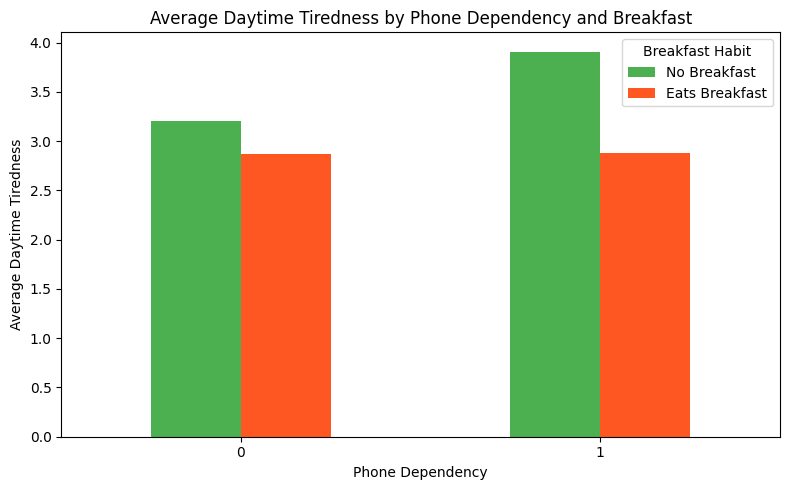

Average Daytime Tiredness by Phone Dependency and Breakfast Habit:
 Eats_Breakfast           0         1
Phone_Dependency                    
0                 3.200000  2.870968
1                 3.909091  2.875000


In [58]:
# Plotting average Daytime Tiredness by Phone Dependency and Breakfast habits
def plot_bar_chart_tiredness_phone():

    plt.figure(figsize=(8, 5))
    avg_tiredness = df.groupby(['Phone_Dependency','Eats_Breakfast'])['Daytime_Tiredness'].mean().unstack()
    avg_tiredness.plot(kind='bar', color=['#4CAF50', '#FF5722'], ax=plt.gca())
    plt.title('Average Daytime Tiredness by Phone Dependency and Breakfast')
    plt.xlabel('Phone Dependency')
    plt.ylabel('Average Daytime Tiredness')
    plt.legend(['No Breakfast','Eats Breakfast'], title="Breakfast Habit")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Printing average tiredness values
    print("Average Daytime Tiredness by Phone Dependency and Breakfast Habit:\n", avg_tiredness)

plot_bar_chart_tiredness_phone()

# **8.Scatter Plot: Sleep Hours vs Daytime Tiredness**





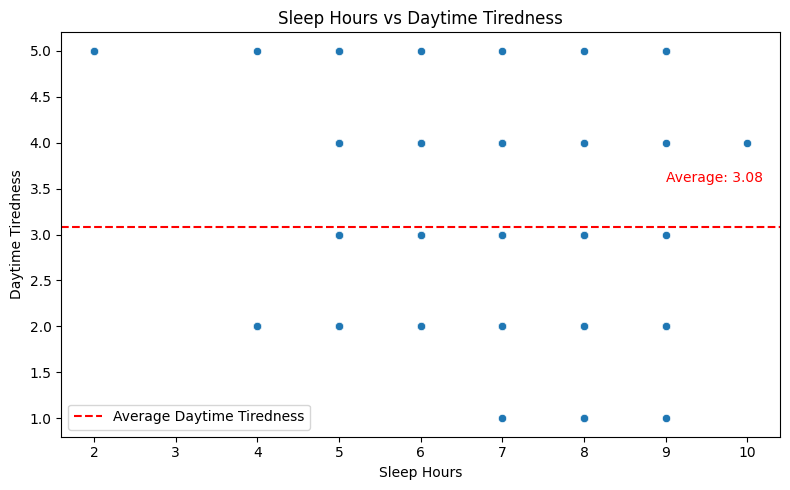

In [59]:
# Comparing the number of hours people sleep and their level of daytime tiredness.

def plot_sleep_hours_vs_daytime_tiredness(df):
    """Create a scatter plot showing the relationship between Sleep Hours and Daytime Tiredness."""
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Sleep_Hours', y='Daytime_Tiredness', data=df)

    # Adding title and axis labels
    plt.title('Sleep Hours vs Daytime Tiredness')
    plt.xlabel('Sleep Hours')
    plt.ylabel('Daytime Tiredness')

    # Adding horizontal line for average tiredness
    avg_tiredness = df['Daytime_Tiredness'].mean()
    plt.axhline(y=avg_tiredness, color='r', linestyle='--', label='Average Daytime Tiredness')
    plt.text(x=df['Sleep_Hours'].max() - 1, y=avg_tiredness + 0.5,
             s=f'Average: {avg_tiredness:.2f}', color='red')

    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sleep_hours_vs_daytime_tiredness(df)



# **9.Box Plot: Sleep Deficit by Enough Sleep Status**

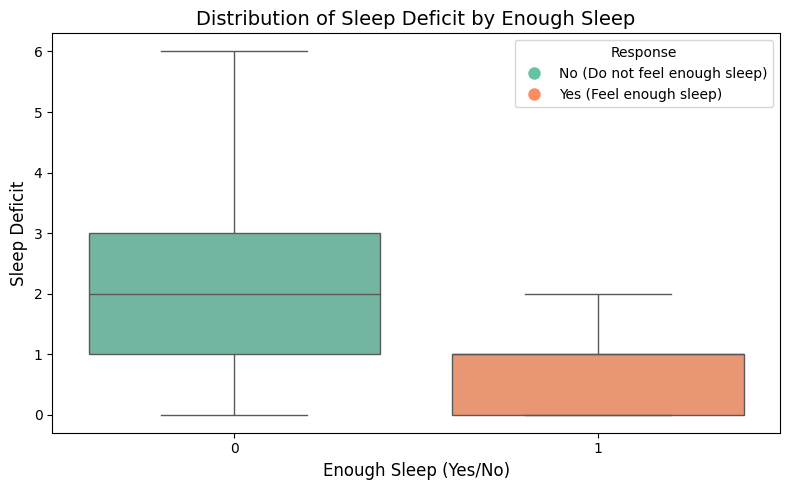

Descriptive statistics for Sleep Deficit by Enough Sleep:
              count      mean       std  min  25%  50%  75%  max
Enough_Sleep                                                    
0              68.0  1.794118  1.333370  0.0  1.0  2.0  3.0  6.0
1              36.0  0.694444  0.749074  0.0  0.0  1.0  1.0  2.0


In [61]:
#  Plotting for Sleep Deficit by Enough Sleep Status
def plot_boxplot_sleep_deficit():

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Enough_Sleep', y='Sleep_Deficit', data=df, palette='Set2', hue='Enough_Sleep', legend=False)

    # Adding title and axis labels
    plt.title('Distribution of Sleep Deficit by Enough Sleep', fontsize=14)
    plt.xlabel('Enough Sleep (Yes/No)', fontsize=12)
    plt.ylabel('Sleep Deficit', fontsize=12)

    # Adding a custom legend
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='No (Do not feel enough sleep)',
                   markerfacecolor='#66c2a5', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Yes (Feel enough sleep)',
                   markerfacecolor='#fc8d62', markersize=10)
    ]
    plt.legend(handles=handles, title='Response', loc='upper right')

    plt.tight_layout()
    plt.show()

    # Displaying descriptive statistics for Sleep Deficit by Enough Sleep
    print("Descriptive statistics for Sleep Deficit by Enough Sleep:")
    print(df.groupby('Enough_Sleep')['Sleep_Deficit'].describe())

plot_boxplot_sleep_deficit()





